In [34]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.datasets import mnist
import matplotlib as pyplot

In [35]:
with np.load("../input/keras-mnist-amazonaws-npz-datasets/mnist.npz") as f:
        x_train, y_train = f['x_train'], f['y_train']
        x_test, y_test = f['x_test'], f['y_test']

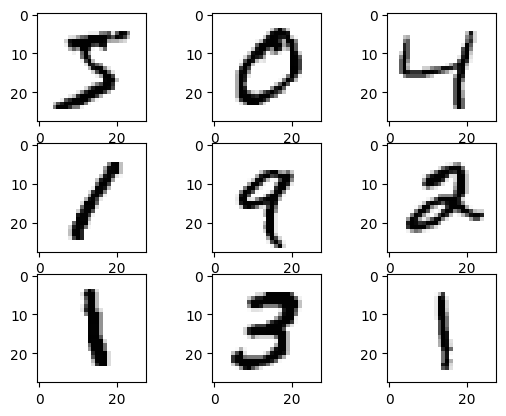

In [36]:
from matplotlib import pyplot
fig , axs = pyplot.subplots(3, 3)
cnt = 0
for i in range(3):
     for j in range(3):
       axs[i, j].imshow(x_train[cnt], cmap='gray_r')
       cnt += 1

In [37]:
# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [38]:
# resize and normalize
input_size = 784
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

In [39]:
model = Sequential() #create model
model.add(Dense(500, input_dim=784, kernel_initializer= 'uniform' , activation= 'relu' ))
model.add(Dense(300, kernel_initializer= 'uniform' , activation= 'relu' ))
model.add(Dense(10, kernel_initializer= 'uniform' , activation= 'softmax' ))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 500)               392500    
                                                                 
 dense_14 (Dense)            (None, 300)               150300    
                                                                 
 dense_15 (Dense)            (None, 10)                3010      
                                                                 
Total params: 545810 (2.08 MB)
Trainable params: 545810 (2.08 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [40]:
model.compile(loss= 'categorical_crossentropy', optimizer= tf.keras.optimizers.SGD(0.0001) , metrics=[ 'accuracy' ])

In [41]:
history=model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=10, batch_size=10)

Epoch 1/10
6000/6000 [==============================] - 26s 4ms/step - loss: 2.2813 - accuracy: 0.2891 - val_loss: 2.2630 - val_accuracy: 0.3874
Epoch 2/10
6000/6000 [==============================] - 24s 4ms/step - loss: 2.2434 - accuracy: 0.4427 - val_loss: 2.2202 - val_accuracy: 0.4997
Epoch 3/10
6000/6000 [==============================] - 25s 4ms/step - loss: 2.1951 - accuracy: 0.5393 - val_loss: 2.1630 - val_accuracy: 0.5812
Epoch 4/10
6000/6000 [==============================] - 24s 4ms/step - loss: 2.1287 - accuracy: 0.6076 - val_loss: 2.0829 - val_accuracy: 0.6378
Epoch 5/10
6000/6000 [==============================] - 24s 4ms/step - loss: 2.0352 - accuracy: 0.6549 - val_loss: 1.9700 - val_accuracy: 0.6818
Epoch 6/10
6000/6000 [==============================] - 23s 4ms/step - loss: 1.9049 - accuracy: 0.6891 - val_loss: 1.8157 - val_accuracy: 0.7050
Epoch 7/10
6000/6000 [==============================] - 24s 4ms/step - loss: 1.7338 - accuracy: 0.7058 - val_loss: 1.6219 - val_ac

In [42]:
scores = model.evaluate(x_test,y_test,batch_size=10,verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 78.34%
